#### Clarusway Python

* [Instructor Landing Page](landing_page.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb)

# SANDBOX (WEEK 3)

Continuing to explore collection types and control statements.

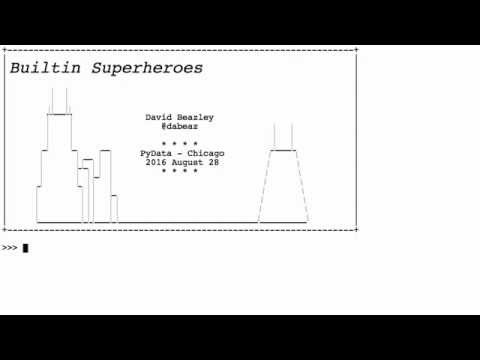

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("j6VSAsKAj98")

In the above Youtube, David Beazley introduced the namedtuple data type. It's in the collections module in the Standard Library.

In [2]:
import collections

In [3]:
from math import sqrt

In [4]:
import math 

In [5]:
math.sqrt(10)

3.1622776601683795

In [6]:
Atom = collections.namedtuple("Element", "protons mass symbol name")

![periodic table](https://sciencenotes.org/wp-content/uploads/2018/05/PeriodicTableMuted2018.png)

In [7]:
lithium = Atom(3, 6.941, "Li", "Lithium")
thorium = Atom(90, 232.038, "Th", "Thorium")

In [8]:
normal = (74, 183.84, 'W', 'Tungsten')

In [9]:
Worker = collections.namedtuple("Employee", "First Last Title DOB Hired")


In [10]:
import datetime

In [11]:
datetime.date(2012, 3, 4)

datetime.date(2012, 3, 4)

In [12]:
emp1 = Worker("Kirby", "Urner", "Instructor", "10/31/2024", "1/1/2021")

In [13]:
emp1

Employee(First='Kirby', Last='Urner', Title='Instructor', DOB='10/31/2024', Hired='1/1/2021')

In [14]:
company = {"kirby":emp1, "lithium":lithium, "thorium":thorium}

In [15]:
company["lithium"]

Element(protons=3, mass=6.941, symbol='Li', name='Lithium')

In [16]:
company.values()

dict_values([Employee(First='Kirby', Last='Urner', Title='Instructor', DOB='10/31/2024', Hired='1/1/2021'), Element(protons=3, mass=6.941, symbol='Li', name='Lithium'), Element(protons=90, mass=232.038, symbol='Th', name='Thorium')])

In [17]:
thorium[3]

'Thorium'

Copying from Sandbox 2:

The code cell below is a little bit ahead of where we are in the Notebooks, in that it uses two of Python's most critical control statements: the while and the if statements. 

Both keywords while and if start statements that might go various ways. For example the `else` keyword is optional with both. `if` may also include any number of `elif` suites, as we test this and that condition. 

The idea of a loop is to repeatedly run through the same code steps, perhaps each time altering some of the variables. The idea of an if statement is to flow differently, top to bottom, depending on what's currently happening with various variables. `break` and `continue` also have a role to play when it comes to loops.

In [18]:
"""
looping version, self quiz.
"""

import keyword

kws = keyword.kwlist[:5]

# cheat sheet
print(kws)  # comment out to not show the answers

def silly_game():
    """
    A while loop prompting a player to input a 
    keyword, which shortens the list until none
    are left or the player escapes using Q.
    """
    while len(kws) > 0:
        answer = input("Give me a keyword please > ")
        if answer.upper() == "Q":
            break
        if answer in kws:
            print("Excellent, thank you")
            kws.remove(answer)
            print("{} remaining".format(len(kws)))
        else:
            print("I couldn't find that in my list.")
    else:
        print("Wow, you got them all!")
    
    print("Thanks for playing!")


['False', 'None', 'True', 'and', 'as']


In [19]:
silly_game()

Give me a keyword please >  q


Thanks for playing!


In [20]:
L = ["this", "is", "a", "list"]
x = "list"
if x in L:
    L.remove("list")

In [21]:
L

['this', 'is', 'a']

In [22]:
x = 1 # assignment outside the loop
while x==1:
    print("Looping...")
    print("It's True!")
    if x==2: 
        print("before break")
        break
    x += 1
else:
    print("else suite")

Looping...
It's True!
else suite


In [23]:
my_list = [1, 2, 3, 4, 5, 6]

In [24]:
ci = list(range(1, 11))
ci

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
ci[3:8]

[4, 5, 6, 7, 8]

In [26]:
len(range(1, 11))

10

In [27]:
for name in "this is just an ordinary string":
    print("{x} is the number".format(x = name))

t is the number
h is the number
i is the number
s is the number
  is the number
i is the number
s is the number
  is the number
j is the number
u is the number
s is the number
t is the number
  is the number
a is the number
n is the number
  is the number
o is the number
r is the number
d is the number
i is the number
n is the number
a is the number
r is the number
y is the number
  is the number
s is the number
t is the number
r is the number
i is the number
n is the number
g is the number


In [28]:
ci[0:9:2]

[1, 3, 5, 7, 9]

In [29]:
list(range(9, -1, -1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [30]:
import numpy as np

In [31]:
np.pi

3.141592653589793

In [32]:
np.arange(0, 9.1, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. ])

In [33]:
np.linspace(0, 9, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [34]:
"hello %f, I like %d" % (475.01, 849)

'hello 475.010000, I like 849'

In [35]:
(3, )

(3,)

### JSON: JavaScript Object Notation

JavaScript and Python have quite a bit in common, especially when it comes to representing common data structures.

Shown below: opening this very notebook, reading it in as a gigantic string, and parsing it into a Python dictionary through the json string loader.

In [36]:
import json

In [37]:
# help(json)

In [38]:
this_notebook = open("sandbox_week_03.ipynb", "r").read()

In [39]:
notebook_dict = json.loads(this_notebook)

In [40]:
notebook_dict.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

In [41]:
notebook_dict['cells'][0]

{'cell_type': 'markdown',
 'id': '41b0fa16-6ded-4217-9a30-f655af063525',
 'metadata': {'jp-MarkdownHeadingCollapsed': True},
 'source': ['#### Clarusway Python\n',
  '\n',
  '* [Instructor Landing Page](landing_page.ipynb)\n',
  '* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>\n',
  '* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb)']}